# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [1]:
%pip install pandas
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# for DateFormatting of Tick Marks
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [3]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [12]:
df_tesla.shape

(124, 3)

In [15]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [17]:
df_tesla.sort_values('TSLA_WEB_SEARCH', ascending=False)

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
123,2020-09-01,31,407.339996
113,2019-11-01,30,65.987999
121,2020-07-01,24,286.152008
116,2020-02-01,23,133.598007
122,2020-08-01,23,498.320007
...,...,...,...
18,2011-12-01,2,5.712000
12,2011-06-01,2,5.826000
15,2011-09-01,2,4.878000
2,2010-08-01,2,3.896000


In [5]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [8]:
df_tesla['TSLA_WEB_SEARCH'].max()

np.int64(31)

In [9]:
df_tesla['TSLA_WEB_SEARCH'].min()

np.int64(2)

In [14]:
print(f"Largest value for Tesla in Web Search: {df_tesla['TSLA_WEB_SEARCH'].max()}")
print(f"Smallest value for Tesla in Web Search: {df_tesla['TSLA_WEB_SEARCH'].min()}")

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


### Unemployment Data

In [4]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [5]:
df_unemployment.shape

(181, 3)

In [6]:
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


In [8]:
print('Largest value for "Unemployemnt Benefits" '
      f"in Web Search: {df_unemployment['UE_BENEFITS_WEB_SEARCH'].max()}")

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [9]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [10]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [11]:
df_btc_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MONTH            73 non-null     object
 1   BTC_NEWS_SEARCH  73 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [12]:
df_btc_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2204 entries, 0 to 2203
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    2204 non-null   object 
 1   CLOSE   2203 non-null   float64
 2   VOLUME  2203 non-null   float64
dtypes: float64(2), object(1)
memory usage: 51.8+ KB


In [13]:
print(f"largest BTC News Search: {df_btc_search['BTC_NEWS_SEARCH'].max()}")

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [15]:
print(f"Missing values for Tesla?: {df_tesla.isna().values.any()}")
print(f"Missing values for U/E?: {df_unemployment.isna().values.any()}")
print(f"Missing values for BTC Search?: {df_btc_search.isna().values.any()}")

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [16]:
print(f"Missing values for BTC price?: {df_btc_price.isna().values.any()}")

Missing values for BTC price?: True


In [17]:
print(f"Number of missing values: {df_btc_price.isna().values.sum()}")

Number of missing values: 2


**Challenge**: Remove any missing values that you found. 

In [18]:
df_btc_price.dropna(inplace=True)

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [19]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [20]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MONTH            124 non-null    object 
 1   TSLA_WEB_SEARCH  124 non-null    int64  
 2   TSLA_USD_CLOSE   124 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.0+ KB


In [21]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)

In [22]:
df_tesla.MONTH[1]

Timestamp('2010-07-01 00:00:00')

In [23]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   MONTH            124 non-null    datetime64[ns]
 1   TSLA_WEB_SEARCH  124 non-null    int64         
 2   TSLA_USD_CLOSE   124 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 3.0 KB


In [24]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [25]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [26]:
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)

In [27]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6


In [28]:
df_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   MONTH                   181 non-null    datetime64[ns]
 1   UE_BENEFITS_WEB_SEARCH  181 non-null    int64         
 2   UNRATE                  181 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 4.4 KB


In [29]:
type(df_btc_search.MONTH[0])

str

In [30]:
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)

In [31]:
type(df_btc_search.MONTH[0])

pandas._libs.tslibs.timestamps.Timestamp

In [32]:
type(df_btc_price.DATE[0])

str

In [33]:
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)

In [34]:
type(df_btc_price.DATE[0])

pandas._libs.tslibs.timestamps.Timestamp

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

To convert our daily data into monthly data, we're going to use the .resample() function. The only things we need to specify is which column to use (i.e., our DATE column) and what kind of sample frequency we want (i.e., the "rule"). We want a monthly frequency, so we use 'M'.  If you ever need to resample a time series to a different frequency, you can find a list of different options here (for example 'Y' for yearly or 'T' for minute).

After resampling, we need to figure out how the data should be treated. In our case, we want the last available price of the month - the price at month-end.

In [63]:
df_btc_price

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,2.105680e+07
1,2014-09-18,424.440002,3.448320e+07
2,2014-09-19,394.795990,3.791970e+07
3,2014-09-20,408.903992,3.686360e+07
4,2014-09-21,398.821014,2.658010e+07
...,...,...,...
2199,2020-09-24,10745.548828,2.301754e+10
2200,2020-09-25,10702.290039,2.123255e+10
2201,2020-09-26,10754.437500,1.810501e+10
2202,2020-09-27,10774.426758,1.801688e+10


In [71]:
df_btc_monthly = df_btc_price.resample('M', on='DATE').last().reset_index()

C:\Users\ksgun\AppData\Local\Temp\ipykernel_25076\3017944430.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_btc_monthly = df_btc_price.resample('M', on='DATE').last().reset_index()


In [72]:
df_btc_monthly

,DATE,CLOSE,VOLUME
0,2014-09-30,386.944000,3.470730e+07
1,2014-10-31,338.321014,1.254540e+07
2,2014-11-30,378.046997,9.194440e+06
3,2014-12-31,320.192993,1.394290e+07
4,2015-01-31,217.464005,2.334820e+07
...,...,...,...
68,2020-05-31,9461.058594,2.777329e+10
69,2020-06-30,9137.993164,1.573580e+10
70,2020-07-31,11323.466797,2.316047e+10
71,2020-08-31,11680.820313,2.228593e+10


# Data Visualisation

### Notebook Formatting & Style Helpers

In [58]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

In [21]:
# Register date converters to avoid warning messages

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

In [42]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


Text(0, 0.5, 'Search Trend')

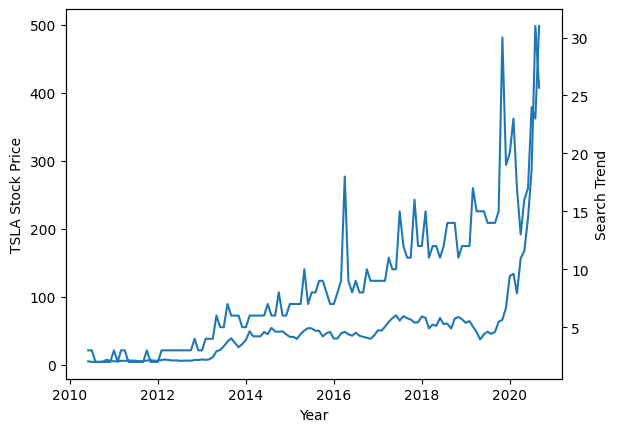

In [44]:
# get current axes, then create another axes that share x
ax1 = plt.gca()
ax2=ax1.twinx()

# plot both
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH)

# add labels and tick marks
ax1.set_xlabel('Year')
ax1.set_ylabel('TSLA Stock Price')
ax2.set_ylabel('Search Trend')

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

Text(0, 0.5, 'Search Trend')

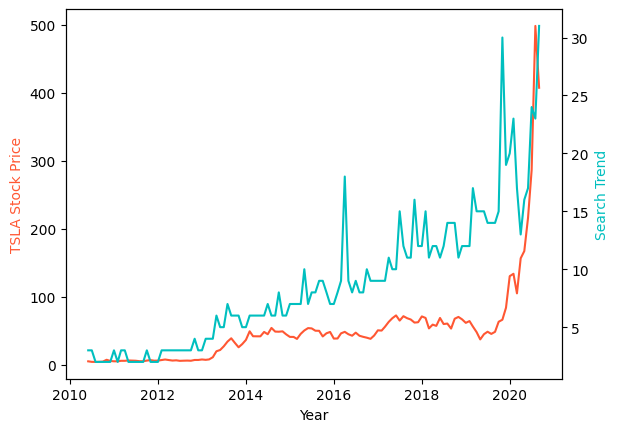

In [46]:
# get current axes, then create another axes that share x
ax1 = plt.gca()
ax2=ax1.twinx()

# plot both
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#ff5733')
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='c')

# add labels and tick marks
ax1.set_xlabel('Year')
ax1.set_ylabel('TSLA Stock Price', color='#ff5733')
ax2.set_ylabel('Search Trend', color='c')

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

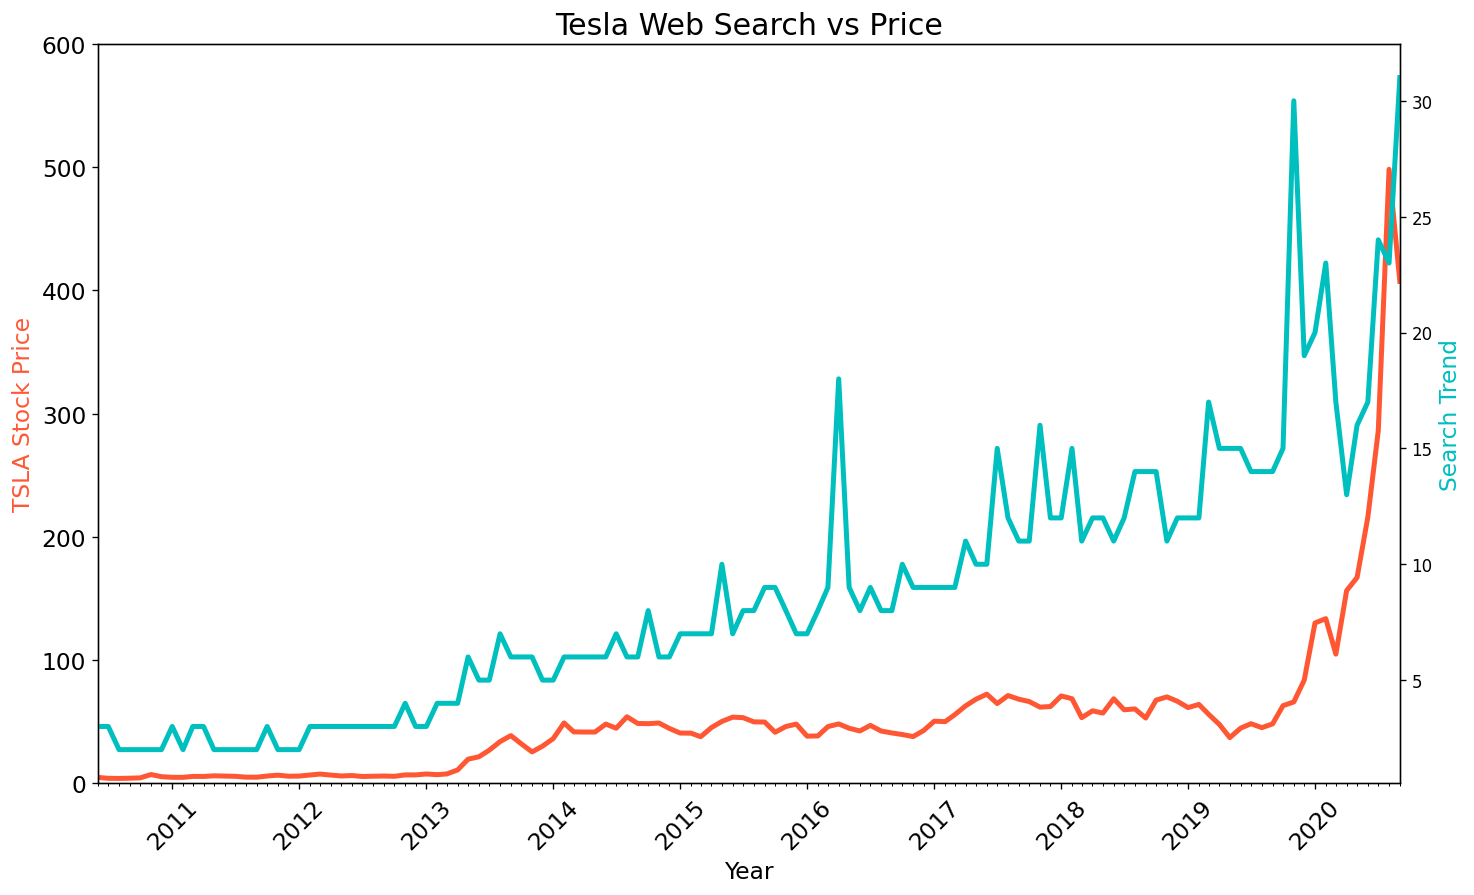

In [59]:
# set figure size
plt.figure(figsize=(14, 8), dpi=120)

# Add title
plt.title('Tesla Web Search vs Price', fontsize=18)

# set font size for ticks, add rotation
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)


# get current axes, then create another axes that share x
ax1 = plt.gca()
ax2=ax1.twinx()

# add labels
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('TSLA Stock Price', color='#ff5733', fontsize=14)
ax2.set_ylabel('Search Trend', color='c', fontsize=14)

# Set x and y limits
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

# plot both
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#ff5733', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='c', linewidth=3)

# Setting minor and major ticks with date formatter
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()



How to add tick formatting for dates on the x-axis. 

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

In [73]:
df_btc_monthly.head()

,DATE,CLOSE,VOLUME
0,2014-09-30,386.944000,34707300.0
1,2014-10-31,338.321014,12545400.0
2,2014-11-30,378.046997,9194440.0
3,2014-12-31,320.192993,13942900.0
4,2015-01-31,217.464005,23348200.0


In [74]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09-01,5
1,2014-10-01,4
2,2014-11-01,4
3,2014-12-01,4
4,2015-01-01,5


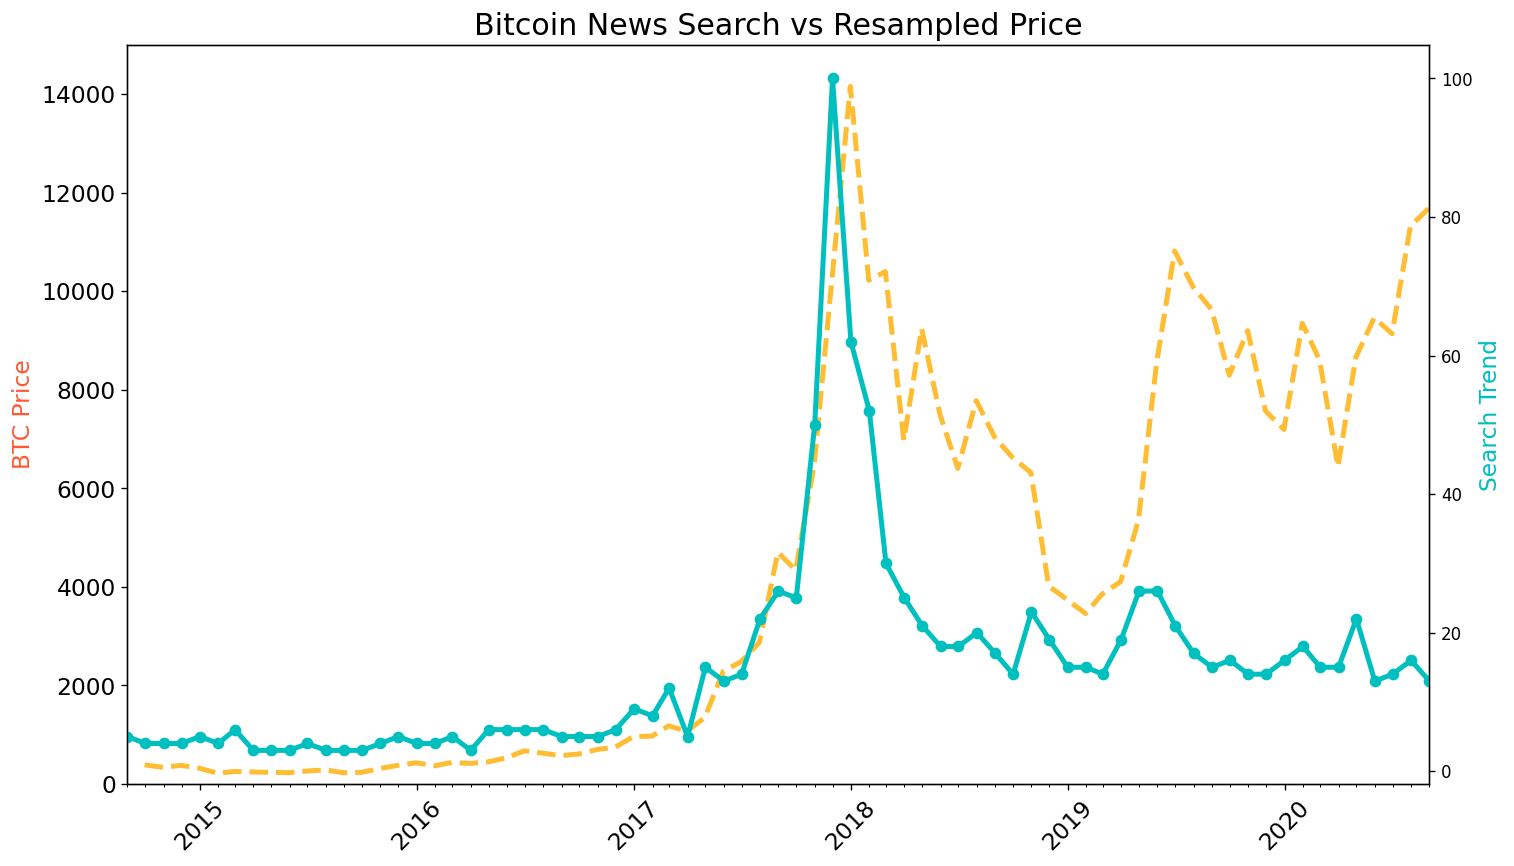

In [87]:
# set figure size
plt.figure(figsize=(14, 8), dpi=120)

# Add title
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)

# set font size for ticks, add rotation
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)


# get current axes, then create another axes that share x
ax1 = plt.gca()
ax2 = ax1.twinx()

# add labels
ax1.set_ylabel('BTC Price', color='#ff5733', fontsize=14)
ax2.set_ylabel('Search Trend', color='c', fontsize=14)

# Set x and y limits
ax1.set_ylim([0, 15000])
ax1.set_xlim([df_btc_search.MONTH.min(), df_btc_search.MONTH.max()])

# plot both
ax1.plot(df_btc_monthly.DATE, df_btc_monthly.CLOSE, color='#ffbd33', linewidth=3, linestyle='--')
ax2.plot(df_btc_search.MONTH, df_btc_search.BTC_NEWS_SEARCH, color='c', linewidth=3, marker='o')

# Setting minor and major ticks with date formatter
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()


### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

In [88]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6


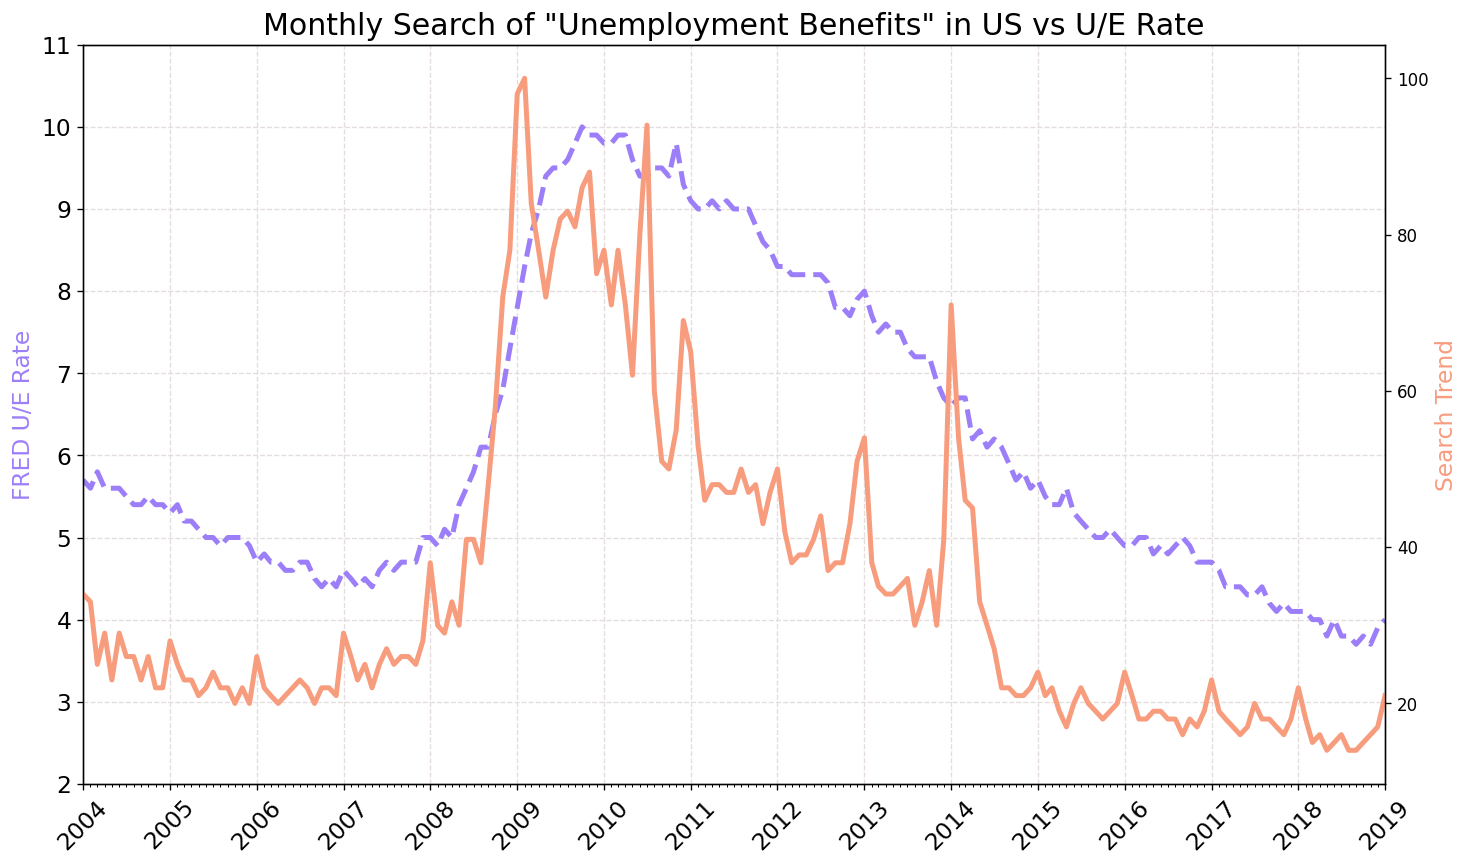

In [94]:
# set figure size
plt.figure(figsize=(14, 8), dpi=120)

# Add title
plt.title('Monthly Search of "Unemployment Benefits" in US vs U/E Rate', fontsize=18)

# set font size for ticks, add rotation
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)


# get current axes, then create another axes that share x
ax1 = plt.gca()
ax2 = ax1.twinx()

# add labels
ax1.set_ylabel('FRED U/E Rate', color='#9c7ef8', fontsize=14)
ax2.set_ylabel('Search Trend', color='#f89c7e', fontsize=14)

# Set x and y limits
ax1.set_ylim([2, 11])
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

# plot both
ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color='#9c7ef8', linewidth=3, linestyle='--')
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color='#f89c7e', linewidth=3)

# Setting minor and major ticks with date formatter
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# show grey gridlines
ax1.grid(color='#e5dddc', linestyle='--')

plt.show()

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


In [104]:
df_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 181 entries, 2004-01-01 to 2019-01-01
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   MONTH                   181 non-null    datetime64[ns]
 1   UE_BENEFITS_WEB_SEARCH  181 non-null    int64         
 2   UNRATE                  181 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 5.7 KB


In [106]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
MONTH,,,
2004-01-01,2004-01-01,34,5.7
2004-02-01,2004-02-01,33,5.6
2004-03-01,2004-03-01,25,5.8
2004-04-01,2004-04-01,29,5.6
2004-05-01,2004-05-01,23,5.6


In [110]:
df_unemployment.reset_index(drop=True, inplace=True)

In [111]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6


In [112]:
df_unemployment

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6
...,...,...,...
176,2018-09-01,14,3.7
177,2018-10-01,15,3.8
178,2018-11-01,16,3.7
179,2018-12-01,17,3.9


In [114]:
# The window is number of observations that are averaged
# Get rolling mean for 6 month period
rol_3 = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean(numeric_only=True)

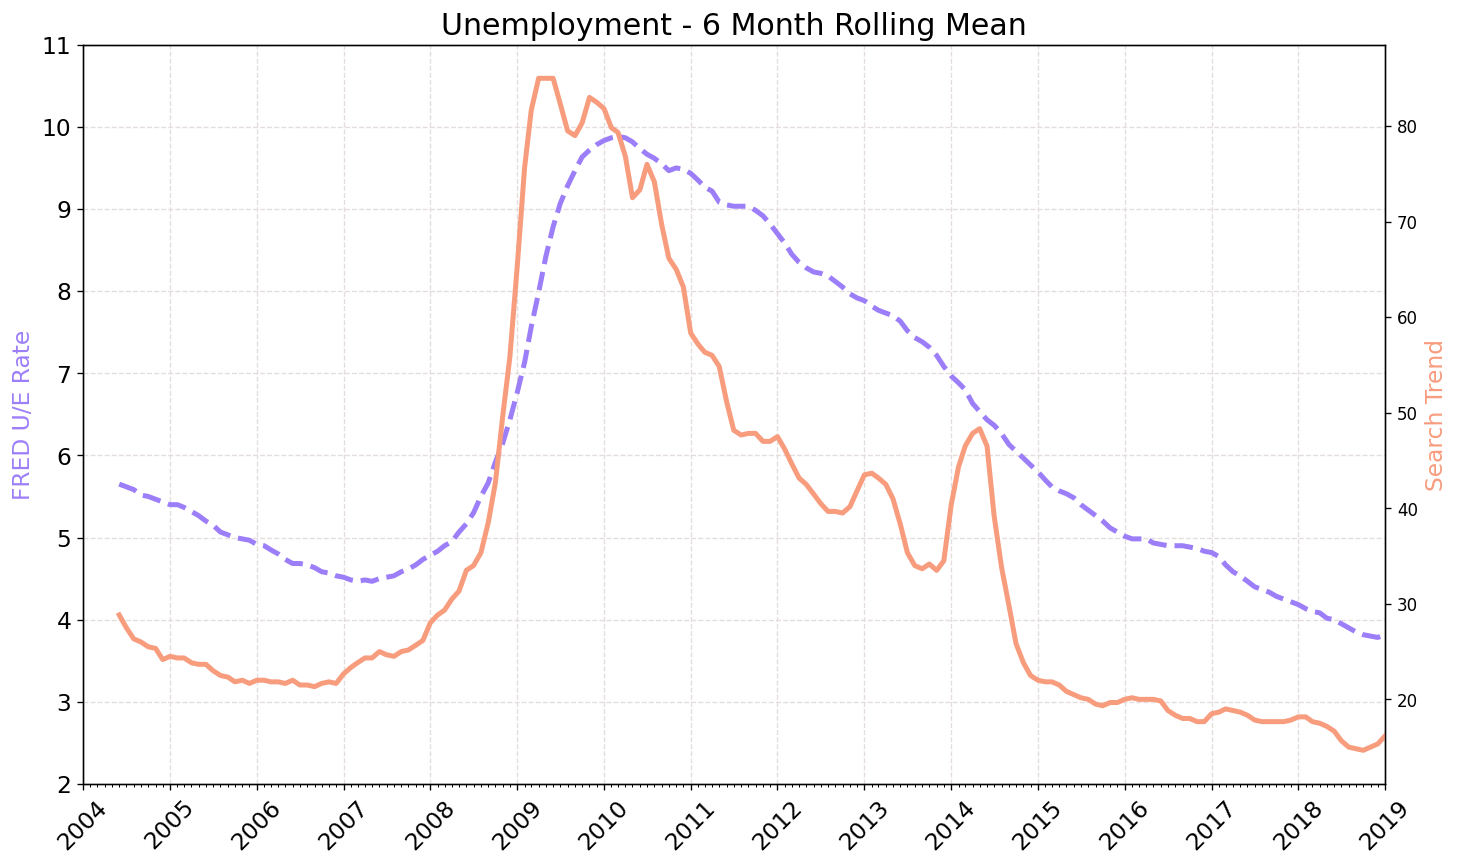

In [115]:


# set figure size
plt.figure(figsize=(14, 8), dpi=120)

# Add title
plt.title('Unemployment - 6 Month Rolling Mean', fontsize=18)

# set font size for ticks, add rotation
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)


# get current axes, then create another axes that share x
ax1 = plt.gca()
ax2 = ax1.twinx()

# add labels
ax1.set_ylabel('FRED U/E Rate', color='#9c7ef8', fontsize=14)
ax2.set_ylabel('Search Trend', color='#f89c7e', fontsize=14)

# Set x and y limits
ax1.set_ylim([2, 11])
ax1.set_xlim([df_unemployment.MONTH[0], df_unemployment.MONTH.max()])

# plot both
ax1.plot(df_unemployment.MONTH, rol_3.UNRATE, color='#9c7ef8', linewidth=3, linestyle='--')
ax2.plot(df_unemployment.MONTH, rol_3.UE_BENEFITS_WEB_SEARCH, color='#f89c7e', linewidth=3)

# Setting minor and major ticks with date formatter
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# show grey gridlines
ax1.grid(color='#e5dddc', linestyle='--')

plt.show()

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [116]:
df_2020 = pd.read_csv("UE Benefits Search vs UE Rate 2004-20.csv")

In [117]:
df_2020

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6
...,...,...,...
195,2020-04,100,14.7
196,2020-05,63,13.3
197,2020-06,53,11.1
198,2020-07,54,10.2


In [118]:
df_2020.MONTH = pd.to_datetime(df_2020.MONTH)

In [119]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   MONTH                   200 non-null    datetime64[ns]
 1   UE_BENEFITS_WEB_SEARCH  200 non-null    int64         
 2   UNRATE                  200 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 4.8 KB


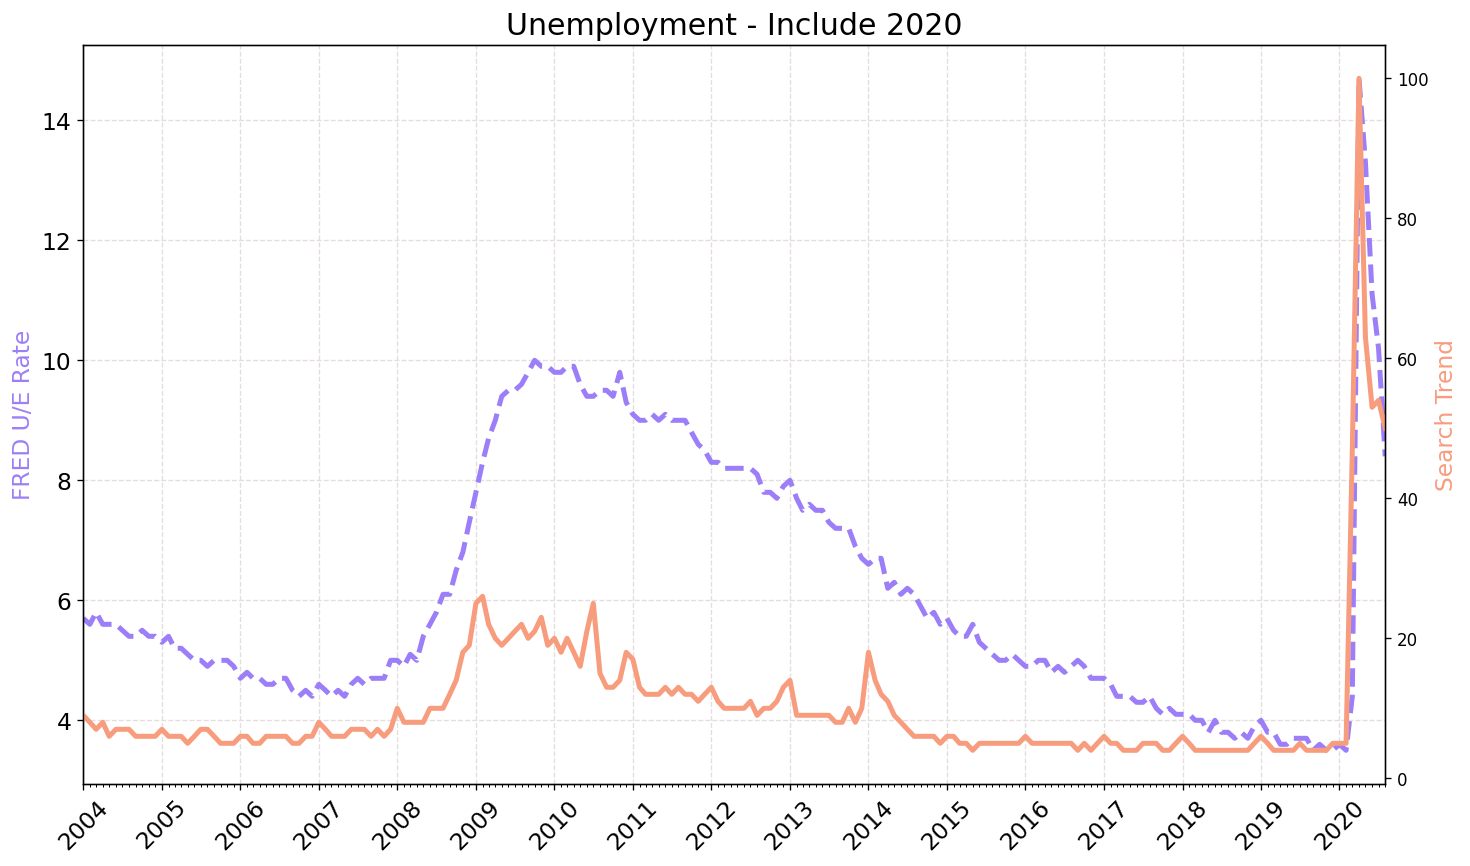

In [121]:
# set figure size
plt.figure(figsize=(14, 8), dpi=120)

# Add title
plt.title('Unemployment - Include 2020', fontsize=18)

# set font size for ticks, add rotation
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)


# get current axes, then create another axes that share x
ax1 = plt.gca()
ax2 = ax1.twinx()

# add labels
ax1.set_ylabel('FRED U/E Rate', color='#9c7ef8', fontsize=14)
ax2.set_ylabel('Search Trend', color='#f89c7e', fontsize=14)

# Set x and y limits
# ax1.set_ylim([2, 11])
ax1.set_xlim([df_2020.MONTH.min(), df_2020.MONTH.max()])

# plot both
ax1.plot(df_2020.MONTH, df_2020.UNRATE, color='#9c7ef8', linewidth=3, linestyle='--')
ax2.plot(df_2020.MONTH, df_2020.UE_BENEFITS_WEB_SEARCH, color='#f89c7e', linewidth=3)

# Setting minor and major ticks with date formatter
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# show grey gridlines
ax1.grid(color='#e5dddc', linestyle='--')

plt.show()